# PRACTICAL 15

## 15. Implement k-nearest neighbour algorithm.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        # Compute Euclidean distances to all training points
        distances = np.sqrt((X_test['Height'] - self.X_train['Height'])**2 + (X_test['Weight'] - self.X_train['Weight'])**2)

        # Combine distances with labels
        neighbors = pd.DataFrame({
            'distance': distances,
            'label': self.y_train
        })

        # Sort by distance and pick top k
        top_k = neighbors.sort_values(by='distance').head(self.k)

        # Count occurrences of each label
        label_counts = top_k['label'].value_counts()

        # Return the most frequent label
        return label_counts.idxmax()

In [4]:
# Training data
df = pd.DataFrame({'Height': [150,155,160,161,158],
                   'Weight': [50,55,60,59,65],
                   'Target': ['medium','medium','large','large','large']})
df

,Height,Weight,Target
0,150,50,medium
1,155,55,medium
2,160,60,large
3,161,59,large
4,158,65,large


In [5]:
# Predicted Data
test_point = pd.Series({'Height': 157, 'Weight': 54})


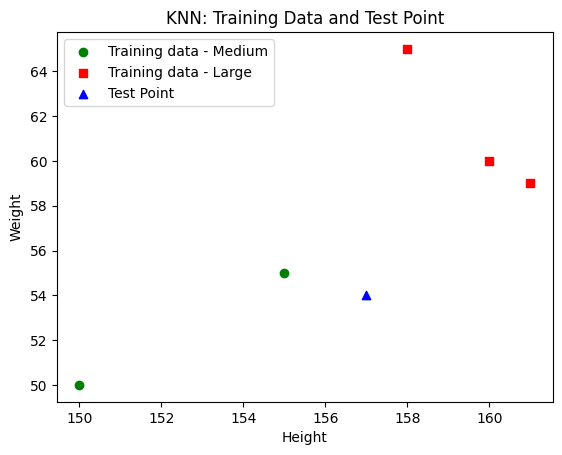

In [12]:
# Create two separate DataFrames for each class
df_medium = df[df['Target'] == 'medium']
df_large = df[df['Target'] == 'large']

# Plot medium points (green)
plt.scatter(df_medium['Height'], df_medium['Weight'], color='green', label='Training data - Medium')

# Plot large points (red)
plt.scatter(df_large['Height'], df_large['Weight'], color='red', label='Training data - Large', marker='s')

plt.scatter(test_point['Height'], test_point['Weight'], color='blue', label='Test Point', marker='^')
plt.title('KNN: Training Data and Test Point')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [7]:
# Separate features and target
X = df[['Height', 'Weight']]
y = df['Target']

In [8]:
# Create and use the KNN model
model = KNN(3)
model.fit(X, y)
prediction = model.predict(test_point)

print("Predicted class:", prediction)

Predicted class: large


In [9]:
# Assign color based on prediction
color_map = {'medium': 'green', 'large': 'red'}
test_color = color_map[prediction]

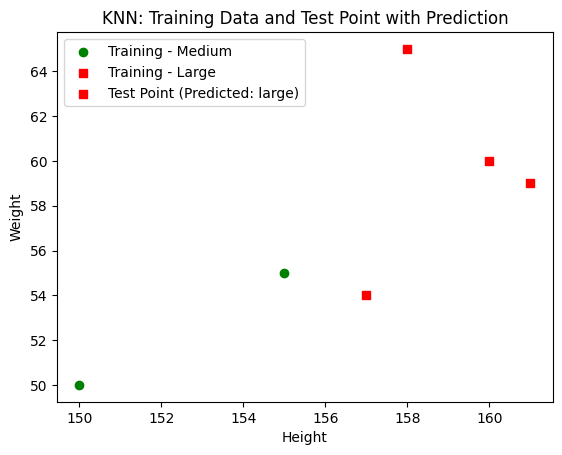

In [ ]:
# Create two separate DataFrames for each class
df_medium = df[df['Target'] == 'medium']
df_large = df[df['Target'] == 'large']

# Plot medium points (green)
plt.scatter(df_medium['Height'], df_medium['Weight'], color='green', label='Training - Medium')

# Plot large points (red)
plt.scatter(df_large['Height'], df_large['Weight'], color='red', label='Training - Large', marker='s')

# Plot test point with predicted color
plt.scatter(test_point['Height'], test_point['Weight'],color=test_color, label=f'Test Point (Predicted: {prediction})', marker='s')

# Labels and legend
plt.title('KNN: Training Data and Test Point with Prediction')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()